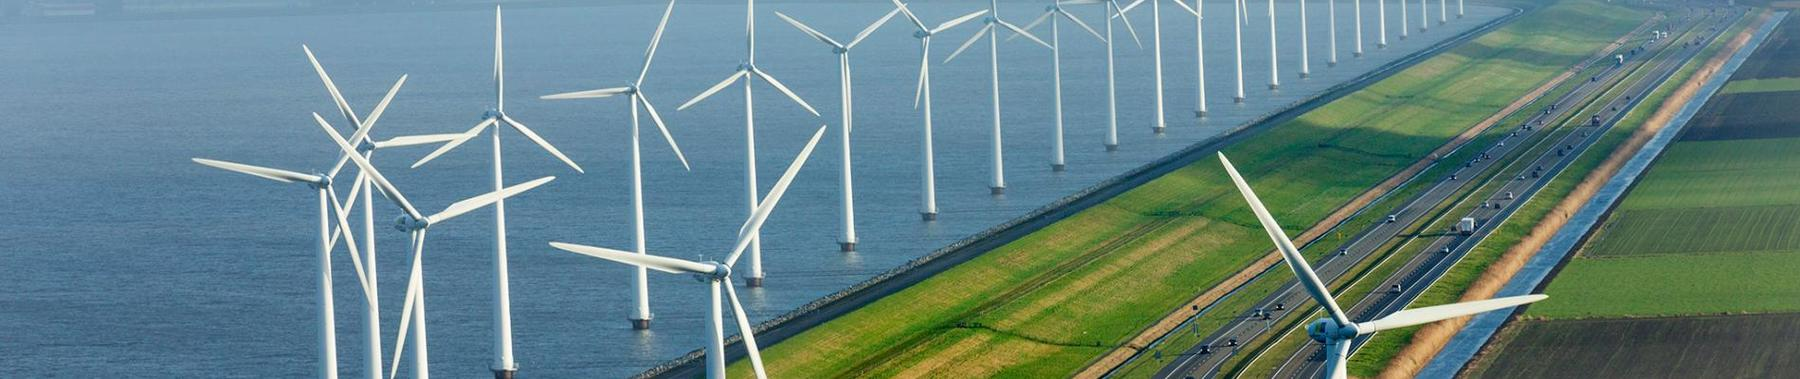


**Energy consumption of the Netherlands**


The energy network of the Netherlands is managed by a few companies. Every year, these companies release on their websites a table with the energy consumption of the areas under their administration. The companies are

* Enexis
* Liander
* Stedin
* Enduris
* Westlandinfra
* Rendo
* Coteq

The data are anonymized by aggregating the Zipcodes so that every entry describes at least 10 connections.

This market is not competitive, meaning that the zones are assigned. This means that every year they roughly provide energy to the same zipcodes. Small changes can happen from year to year either for a change of management or for a different aggregation of zipcodes.

Content
Every file contains information about groups of zipcodes managed by one of the three companies for a specific year.

Acknowledgements
All the data are taken from the following websites:

* https://www.enexis.nl/over-ons/wat-bieden-we/andere-diensten/open-data
* https://www.liander.nl/partners/datadiensten/open-data/data
* https://www.stedin.net/zakelijk/open-data/verbruiksgegevens
* https://data.overheid.nl/dataset/enexis-verbruiksdata (up to 2016)
* https://www.enduris.nl/over-enduris/energietransitie/open-data.htm
* https://www.westlandinfra.nl/over-westland-infra/open-data
* https://www.rendonetwerken.nl/algemeen/opendata/disclaimer/beschikbare-data/
* https://coteqnetbeheer.nl/Over-Coteq/Open-data

Inspiration
* How are the smart meters spreading?
* What is the trend of home-produced energy? (solar panel)
* Can we see if there are many electric cars in a neighborhood?
* What is going to be the energy consumption the next year?

**ABOUT DATASET**

Every file is from a network administrator from a specific year.

The columns in each file are:

* net_manager: code of the regional network manager
* purchase_area: code of the area where the energy is purchased
* street: Name of the street
* zipcode_from and zipcode_to: 2 columns for the range of zipcodes covered, 4 numbers and 2 letters
* city: Name of the city
* num_connections: Number of connections in the range of zipcodes
* delivery_perc: percentage of the net consumption of electricity or gas. The lower, the more energy was given back to the grid (for example if you have solar panels)
* perc_of_active_connections: Percentage of active connections in the zipcode range
* type_of_connection: principal type of connection in the zipcode range. For electricity is # fuses X # ampère. For gas is G4, G6, G10, G16, G25
* type_conn_perc: percentage of presence of the principal type of connection in the zipcode range
* annual_consume: Annual consume. Kwh for electricity, m3 for gas
* annual_consume_lowtarif_perc: Percentage of consume during the low tarif hours. From 10 p.m. to 7 a.m. and during weekends.
* smartmeter_perc: percentage of smartmeters in the zipcode ranges

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**IMPORTING LIBRARIES AND DATASET**

In [2]:
# Importing Libraries
import glob
import os 
from IPython import display
import pandas as pd
import numpy as np
from scipy import stats
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
ELECTRICITY_PATH = '../input/dutch-energy/Electricity'
GAS_PATH = '../input/dutch-energy/Gas'

Elecfiles = glob.glob(os.path.join(ELECTRICITY_PATH , "*.csv"))
Gasfiles = glob.glob(os.path.join(GAS_PATH , "*.csv"))

Eleclist = []
Gaslist = []

print(len(Elecfiles))

75


In [4]:
# To get the list of dataframes in our electricity directory
for filename in Elecfiles:
    df = pd.read_csv(filename)
    #to get th year from our file name
    file_name = os.path.basename(filename)
    x = file_name.split('.')
    year = x[0][-4:]
    df['year'] = year
    Eleclist.append(df)
    
# To get the list of dataframes in our electricity directory
for filename in Gasfiles:
    df = pd.read_csv(filename, index_col=None, header=0)
    #to get th year from our file name
    file_name = os.path.basename(filename)
    #split files by the '.'
    x = file_name.split('.')
    #collect the year variable by the last four values 
    year = x[0][-4:]
    df['year'] = year
    Gaslist.append(df)
    
print(len(Eleclist))
print(len(Gaslist))

75
75


In [ ]:
# Create our final dataframes containing all our data
Elec_df = pd.concat(Eleclist, ignore_index=True)
Gas_df = pd.concat(Gaslist, ignore_index=True)

del(Eleclist)
del(Gaslist)

Elec_df.head(), Gas_df.head()

**DATA CLEANING**

In [6]:
Elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077352 entries, 0 to 4077351
Data columns (total 18 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   net_manager                   object 
 1   purchase_area                 object 
 2   street                        object 
 3   zipcode_from                  object 
 4   zipcode_to                    object 
 5   city                          object 
 6   num_connections               float64
 7   delivery_perc                 float64
 8   perc_of_active_connections    float64
 9   type_conn_perc                object 
 10  type_of_connection            object 
 11  annual_consume                float64
 12  year                          object 
 13  ï»¿NETBEHEERDER               float64
 14  annual_consume_lowtarif_perc  float64
 15  smartmeter_perc               float64
 16  %Defintieve aansl (NRM)       float64
 17  STANDAARDDEVIATIE             object 
dtypes: float64(8), object(

In [7]:
Gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704367 entries, 0 to 3704366
Data columns (total 18 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   net_manager                   object 
 1   purchase_area                 object 
 2   street                        object 
 3   zipcode_from                  object 
 4   zipcode_to                    object 
 5   city                          object 
 6   num_connections               float64
 7   delivery_perc                 float64
 8   perc_of_active_connections    float64
 9   type_conn_perc                object 
 10  type_of_connection            object 
 11  annual_consume                float64
 12  annual_consume_lowtarif_perc  float64
 13  smartmeter_perc               float64
 14  year                          object 
 15  ï»¿NETBEHEERDER               float64
 16  %Defintieve aansl (NRM)       float64
 17  STANDAARDDEVIATIE             float64
dtypes: float64(9), object(

In [8]:
print(Elec_df.shape)
print(Gas_df.shape)

(4077352, 18)
(3704367, 18)


In [9]:
print(Elec_df.isnull().sum().sort_values(ascending=False))
print(Gas_df.isnull().sum().sort_values(ascending=False))

%Defintieve aansl (NRM)         4053010
ï»¿NETBEHEERDER                 4048128
STANDAARDDEVIATIE               3991014
purchase_area                    886657
type_conn_perc                   124940
type_of_connection               107588
net_manager                       29224
annual_consume_lowtarif_perc      13268
smartmeter_perc                   13268
delivery_perc                      2069
perc_of_active_connections         1487
num_connections                       7
city                                  0
zipcode_to                            0
annual_consume                        0
year                                  0
zipcode_from                          0
street                                0
dtype: int64
STANDAARDDEVIATIE               3704367
%Defintieve aansl (NRM)         3681232
ï»¿NETBEHEERDER                 3677258
smartmeter_perc                 1105767
purchase_area                    235936
type_conn_perc                   144258
type_of_connection         

We can observe a number of columns in both dataframes with a large amount of missing values, especially the last three values in the dataframes. We will also be dropping some irrelevant or less important columns to keep our dataframe compact.

In [10]:
Elec_df = Elec_df.drop(['ï»¿NETBEHEERDER', '%Defintieve aansl (NRM)', 'STANDAARDDEVIATIE', 'purchase_area', 'net_manager'], axis=1)
Gas_df = Gas_df.drop(['ï»¿NETBEHEERDER', '%Defintieve aansl (NRM)', 'STANDAARDDEVIATIE', 'purchase_area', 'net_manager'], axis=1)

print(Elec_df.isnull().sum().sort_values(ascending=False))
print(Gas_df.isnull().sum().sort_values(ascending=False))

type_conn_perc                  124940
type_of_connection              107588
annual_consume_lowtarif_perc     13268
smartmeter_perc                  13268
delivery_perc                     2069
perc_of_active_connections        1487
num_connections                      7
street                               0
zipcode_from                         0
zipcode_to                           0
city                                 0
annual_consume                       0
year                                 0
dtype: int64
smartmeter_perc                 1105767
type_conn_perc                   144258
type_of_connection                82976
annual_consume_lowtarif_perc      44787
delivery_perc                      5017
perc_of_active_connections         5017
num_connections                      10
zipcode_from                          1
street                                0
zipcode_to                            0
city                                  0
annual_consume                        0


In [11]:
# Dropping the relatively smaller missing values in their respective columns
Elec_df = Elec_df.dropna(subset=['num_connections', 'perc_of_active_connections', 'delivery_perc'])
Gas_df = Gas_df.dropna(subset=['zipcode_from', 'num_connections'])

In [12]:
print(Elec_df.isnull().sum().sort_values(ascending=False))
print(Gas_df.isnull().sum().sort_values(ascending=False))

type_conn_perc                  124933
type_of_connection              107581
annual_consume_lowtarif_perc     11774
smartmeter_perc                  11774
street                               0
zipcode_from                         0
zipcode_to                           0
city                                 0
num_connections                      0
delivery_perc                        0
perc_of_active_connections           0
annual_consume                       0
year                                 0
dtype: int64
smartmeter_perc                 1105757
type_conn_perc                   144248
type_of_connection                82966
annual_consume_lowtarif_perc      44777
delivery_perc                      5017
perc_of_active_connections         5017
street                                0
zipcode_from                          0
zipcode_to                            0
city                                  0
num_connections                       0
annual_consume                        0


In [13]:
Elec_df.describe()

,num_connections,delivery_perc,perc_of_active_connections,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
count,4.075276e+06,4.075276e+06,4.075276e+06,4.075276e+06,4.063502e+06,4.063502e+06
mean,2.326157e+01,9.591369e+01,9.691215e+01,4.450775e+03,5.301471e+01,2.356887e+01
std,1.550951e+01,9.385688e+00,9.580830e+00,3.614092e+03,3.072874e+01,3.256417e+01
min,1.379000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,9.545000e+01,1.000000e+02,2.677000e+03,2.857000e+01,0.000000e+00
50%,2.000000e+01,1.000000e+02,1.000000e+02,3.476000e+03,4.920000e+01,6.250000e+00
75%,2.600000e+01,1.000000e+02,1.000000e+02,4.681000e+03,8.261000e+01,3.636000e+01
max,1.330000e+03,1.000000e+02,1.000000e+02,4.299312e+05,1.000000e+02,1.000000e+02


<AxesSubplot:xlabel='annual_consume', ylabel='Density'>

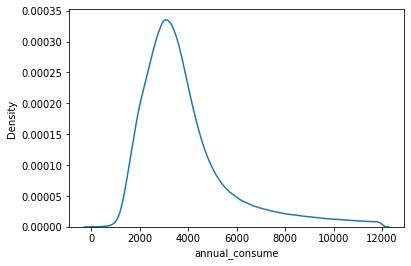

In [14]:
# Elec_df[Elec_df['annual_consume']<12000].sort_values(by='annual_consume', ascending=False) 
Elec_df = Elec_df[Elec_df['annual_consume']<12000]
# Elec_df[Elec_df['annual_consume']==0]
Elec_df = Elec_df[Elec_df['annual_consume']>0]
sns.kdeplot(x=Elec_df['annual_consume'])

<AxesSubplot:xlabel='num_connections', ylabel='Density'>

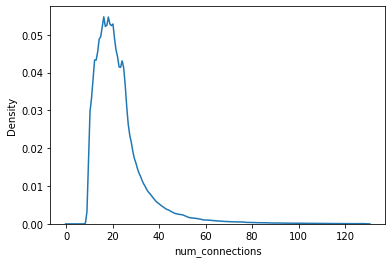

In [15]:
# Elec_df[Elec_df['num_connections']>100].sort_values(by='annual_consume', ascending=False)
Elec_df = Elec_df[Elec_df['num_connections']<130]
sns.kdeplot(x=Elec_df['num_connections'])

In [16]:
# Elec_df['type_of_connection'].value_counts()
Elec_df[(Elec_df['annual_consume_lowtarif_perc'].isna()) & (Elec_df['smartmeter_perc'].isna())]
# Elec_df[(Elec_df['annual_consume_lowtarif_perc']==0) & (Elec_df['smartmeter_perc']==0)]
# Elec_df[(Elec_df['annual_consume_lowtarif_perc']==0) & (Elec_df['smartmeter_perc']>0)]
# Elec_df[(Elec_df['annual_consume_lowtarif_perc']>0) & (Elec_df['smartmeter_perc']==0)]

,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,year,annual_consume_lowtarif_perc,smartmeter_perc
0,Stationsplein,7901AA,7901AA,HOOGEVEEN,42.0,100.00,97.62,71.0,1x40,3356.0,2012,NaN,NaN
1,Stationsstraat,7901AB,7901AB,HOOGEVEEN,17.0,100.00,100.00,65.0,3x25,8338.0,2012,NaN,NaN
2,Crerarstraat,7901AC,7901AC,HOOGEVEEN,17.0,100.00,100.00,94.0,1x25,2359.0,2012,NaN,NaN
3,Crerarstraat,7901AD,7901AD,HOOGEVEEN,18.0,100.00,94.44,72.0,1x25,2625.0,2012,NaN,NaN
4,Crerarstraat,7901AE,7901AG,HOOGEVEEN,20.0,100.00,100.00,85.0,3x25,7619.0,2012,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845308,Burg G W Stroinkweg,8343XK,8343XK,ZUIDVEEN,18.0,88.89,100.00,72.0,3x25,5861.0,2014,NaN,NaN
2845309,Burg G W Stroinkweg,8343XL,8343XL,ZUIDVEEN,20.0,90.00,100.00,40.0,1x25,9414.0,2014,NaN,NaN
2845310,Burg G W Stroinkweg,8343XM,8343XM,ZUIDVEEN,20.0,100.00,100.00,55.0,3x25,5398.0,2014,NaN,NaN
2845311,Leemkoele,8343XN,8343XN,ZUIDVEEN,18.0,94.44,100.00,56.0,1x40,2977.0,2014,NaN,NaN


In [17]:
Elec_df['annual_consume_lowtarif_perc'] = Elec_df['annual_consume_lowtarif_perc'].fillna(0)
Elec_df['smartmeter_perc'] = Elec_df['smartmeter_perc'].fillna(0)

In [18]:
print(Elec_df.isnull().sum().sort_values(ascending=False))

type_conn_perc                  117842
type_of_connection              102663
street                               0
zipcode_from                         0
zipcode_to                           0
city                                 0
num_connections                      0
delivery_perc                        0
perc_of_active_connections           0
annual_consume                       0
year                                 0
annual_consume_lowtarif_perc         0
smartmeter_perc                      0
dtype: int64


In [19]:
print(Elec_df['type_conn_perc'].dtype)
# Elec_df['type_conn_perc'].astype(float) ###shows error
print(len(Elec_df['type_conn_perc'].unique()))
Elec_df['type_conn_perc'] = Elec_df['type_conn_perc'].str.replace(',', '.')
Elec_df['type_conn_perc'] = Elec_df['type_conn_perc'].astype(float)
print(Elec_df['type_conn_perc'].dtype)

object
3350
float64


In [20]:
print(Elec_df['type_of_connection'].mode())
print(Elec_df['type_conn_perc'].median())
Elec_df['type_of_connection'] = Elec_df['type_of_connection'].fillna(Elec_df['type_of_connection'].mode()[0])
Elec_df['type_conn_perc'] = Elec_df['type_conn_perc'].fillna(Elec_df['type_conn_perc'].median())
print(Elec_df.isnull().sum().sort_values(ascending=False))

0    1x35
dtype: object
72.73
street                          0
zipcode_from                    0
zipcode_to                      0
city                            0
num_connections                 0
delivery_perc                   0
perc_of_active_connections      0
type_conn_perc                  0
type_of_connection              0
annual_consume                  0
year                            0
annual_consume_lowtarif_perc    0
smartmeter_perc                 0
dtype: int64


In [21]:
# Convert to Datetime
Elec_df['year'] = pd.to_datetime(Elec_df.year)

In [22]:
print(Gas_df.isnull().sum().sort_values(ascending=False))

smartmeter_perc                 1105757
type_conn_perc                   144248
type_of_connection                82966
annual_consume_lowtarif_perc      44777
delivery_perc                      5017
perc_of_active_connections         5017
street                                0
zipcode_from                          0
zipcode_to                            0
city                                  0
num_connections                       0
annual_consume                        0
year                                  0
dtype: int64


In [23]:
Gas_df.describe()

,num_connections,delivery_perc,perc_of_active_connections,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
count,3.704356e+06,3.699339e+06,3.699339e+06,3.704356e+06,3.659579e+06,2.598599e+06
mean,2.194723e+01,9.999984e+01,9.848381e+01,1.801237e+03,1.000115e-03,2.037210e+01
std,1.281645e+01,6.332195e-02,7.239671e+00,1.080478e+03,1.384008e+00,3.105165e+01
min,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.000000e+02,1.000000e+02,1.216000e+03,0.000000e+00,0.000000e+00
50%,1.900000e+01,1.000000e+02,1.000000e+02,1.585000e+03,0.000000e+00,4.170000e+00
75%,2.500000e+01,1.000000e+02,1.000000e+02,2.133000e+03,0.000000e+00,2.609000e+01
max,1.065000e+03,1.000000e+02,1.000000e+02,3.729100e+04,2.225000e+03,1.000000e+02


In [24]:
#Replacing these columns with 0 using our filter
Gas_df[(Gas_df['perc_of_active_connections'].isna()) & (Gas_df['delivery_perc'].isna()) & 
       (Gas_df['annual_consume_lowtarif_perc'].isna()) & (Gas_df['smartmeter_perc'].isna())] = 0
print(Gas_df.isnull().sum().sort_values(ascending=False))

smartmeter_perc                 1100740
type_conn_perc                   144248
type_of_connection                82966
annual_consume_lowtarif_perc      39760
street                                0
zipcode_from                          0
zipcode_to                            0
city                                  0
num_connections                       0
delivery_perc                         0
perc_of_active_connections            0
annual_consume                        0
year                                  0
dtype: int64


In [25]:
Gas_df[(Gas_df['smartmeter_perc'].isna()) & (Gas_df['annual_consume_lowtarif_perc'].isna())]

,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
664077,Langewijk,7701AA,7701AA,DEDEMSVAART,18.0,100.0,100.00,94,G4,2505.0,NaN,NaN,2018
664078,Langewijk,7701AB,7701AB,DEDEMSVAART,10.0,100.0,100.00,80,G4,3678.0,NaN,NaN,2018
664079,Langewijk,7701AC,7701AC,DEDEMSVAART,17.0,100.0,100.00,94,G4,1991.0,NaN,NaN,2018
664080,Langewijk,7701AD,7701AD,DEDEMSVAART,20.0,100.0,100.00,100,G4,1857.0,NaN,NaN,2018
664081,Langewijk,7701AE,7701AE,DEDEMSVAART,13.0,100.0,100.00,92,G4,2359.0,NaN,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007401,Wateren,8438SB,8438SB,WATEREN,23.0,100.0,100.00,74.0,G4,3836.0,NaN,NaN,2011
3007402,Schurerslaan,8438SC,8438SC,WATEREN,41.0,100.0,95.12,93.0,G4,2089.0,NaN,NaN,2011
3007403,Lange Drift,8438SE,8438SG,WATEREN,17.0,100.0,100.00,71.0,G4,2207.0,NaN,NaN,2011
3007404,Huenderweg,8438SH,8438ST,WATEREN,85.0,100.0,98.82,98.0,G4,1891.0,NaN,NaN,2011


In [26]:
Gas_df[Gas_df['delivery_perc']==100].describe()

,num_connections,delivery_perc,perc_of_active_connections,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
count,3.699250e+06,3699250.0,3.699250e+06,3.699250e+06,3.659492e+06,2.598513e+06
mean,2.194814e+01,100.0,9.848410e+01,1.801033e+03,1.000139e-03,2.037213e+01
std,1.281761e+01,0.0,7.238571e+00,1.080580e+03,1.384025e+00,3.105179e+01
min,5.000000e+00,100.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,100.0,1.000000e+02,1.215880e+03,0.000000e+00,0.000000e+00
50%,1.900000e+01,100.0,1.000000e+02,1.585000e+03,0.000000e+00,4.170000e+00
75%,2.500000e+01,100.0,1.000000e+02,2.133000e+03,0.000000e+00,2.609000e+01
max,1.065000e+03,100.0,1.000000e+02,3.729100e+04,2.225000e+03,1.000000e+02


In [ ]:
a = Gas_df[(Gas_df['smartmeter_perc'].isna()) & (Gas_df['annual_consume_lowtarif_perc'].isna())]['annual_consume_lowtarif_perc'].index
b = Gas_df[(Gas_df['smartmeter_perc'].isna()) & (Gas_df['annual_consume_lowtarif_perc'].isna())]['smartmeter_perc'].index

Gas_df.loc[a,'annual_consume_lowtarif_perc'] = Gas_df[Gas_df['delivery_perc']==100].median()['delivery_perc']
Gas_df.loc[b,'smartmeter_perc'] = Gas_df[Gas_df['delivery_perc']==100].median()['smartmeter_perc']
print(Gas_df.isnull().sum().sort_values(ascending=False))

In [28]:
Gas_df['type_of_connection'].dtype
print(len(Gas_df['type_conn_perc'].unique()))
Gas_df['type_conn_perc'] = Gas_df['type_conn_perc'].str.replace(',', '.')
Gas_df['type_conn_perc'] = Gas_df['type_conn_perc'].astype(float)
print(Gas_df['type_conn_perc'].dtype)
print(Gas_df['type_of_connection'].mode())
print(Gas_df['type_conn_perc'].median())
Gas_df['type_of_connection'] = Gas_df['type_of_connection'].fillna(Gas_df['type_of_connection'].mode()[0])
Gas_df['type_conn_perc'] = Gas_df['type_conn_perc'].fillna(Gas_df['type_conn_perc'].median())
print(Gas_df.isnull().sum().sort_values(ascending=False))

2044
float64
0    G4
dtype: object
100.0
smartmeter_perc                 1060980
street                                0
zipcode_from                          0
zipcode_to                            0
city                                  0
num_connections                       0
delivery_perc                         0
perc_of_active_connections            0
type_conn_perc                        0
type_of_connection                    0
annual_consume                        0
annual_consume_lowtarif_perc          0
year                                  0
dtype: int64


In [29]:
Gas_df[Gas_df['smartmeter_perc'].isna()]

,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
136641,Sasdijk,4251AA,4251AA,WERKENDAM,40.0,100.0,100.0,100.0,G4,1862.95,0.0,NaN,2018
136642,Sasdijk,4251AB,4251AB,WERKENDAM,16.0,100.0,100.0,100.0,G4,2066.19,0.0,NaN,2018
136643,Sasdijk,4251AC,4251AC,WERKENDAM,11.0,100.0,100.0,100.0,G4,1606.73,0.0,NaN,2018
136644,Sasdijk,4251AD,4251AD,WERKENDAM,22.0,100.0,100.0,100.0,G4,1876.14,0.0,NaN,2018
136645,Heuveltje,4251AE,4251AG,WERKENDAM,21.0,100.0,100.0,100.0,G4,2180.38,0.0,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002476,'t-Lage eind,9998XA,9998XA,ROTTUM GN,13.0,100.0,100.0,100.0,G4,1734.00,0.0,NaN,2015
3002477,Jacob Tilbusscherweg,9998XB,9998XB,ROTTUM GN,21.0,100.0,100.0,100.0,G4,2698.00,0.0,NaN,2015
3002478,Kloosterweg,9998XC,9998XD,ROTTUM GN,18.0,100.0,100.0,100.0,G4,2203.00,0.0,NaN,2015
3002479,Stitswerderweg,9998XE,9999XJ,STITSWERD,27.0,100.0,100.0,100.0,G4,3336.00,0.0,NaN,2015


In [30]:
Gas_df['smartmeter_perc'] = Gas_df['smartmeter_perc'].fillna(Gas_df['smartmeter_perc'].median())
# Gas_df['smartmeter_perc'].median()
Gas_df.describe()

,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
count,3.704356e+06,3.704356e+06,3.704356e+06,3.704356e+06,3.704356e+06,3.704356e+06,3.704356e+06
mean,2.191868e+01,9.986441e+01,9.835043e+01,9.989163e+01,1.798600e+03,1.074319e+00,1.553010e+01
std,1.283482e+01,3.678198e+00,8.090735e+00,1.608825e+00,1.081880e+03,1.039573e+01,2.704642e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.214000e+03,0.000000e+00,0.000000e+00
50%,1.900000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.584000e+03,0.000000e+00,4.170000e+00
75%,2.500000e+01,1.000000e+02,1.000000e+02,1.000000e+02,2.132000e+03,0.000000e+00,1.111000e+01
max,1.065000e+03,1.000000e+02,1.000000e+02,1.000000e+02,3.729100e+04,2.225000e+03,1.000000e+02


In [31]:
print(Gas_df.isnull().sum().sort_values(ascending=False))

street                          0
zipcode_from                    0
zipcode_to                      0
city                            0
num_connections                 0
delivery_perc                   0
perc_of_active_connections      0
type_conn_perc                  0
type_of_connection              0
annual_consume                  0
annual_consume_lowtarif_perc    0
smartmeter_perc                 0
year                            0
dtype: int64


In [32]:
Gas_df['year'] = pd.to_datetime(Gas_df.year)

**EDA & DATA VISUALIZTION**

In [33]:
#  We will start with visualisations for our electrical dataframe
Elec_df.head()

,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,year,annual_consume_lowtarif_perc,smartmeter_perc
0,Stationsplein,7901AA,7901AA,HOOGEVEEN,42.0,100.0,97.62,72.73,1x40,3356.0,2012-01-01,0.0,0.0
1,Stationsstraat,7901AB,7901AB,HOOGEVEEN,17.0,100.0,100.00,72.73,3x25,8338.0,2012-01-01,0.0,0.0
2,Crerarstraat,7901AC,7901AC,HOOGEVEEN,17.0,100.0,100.00,72.73,1x25,2359.0,2012-01-01,0.0,0.0
3,Crerarstraat,7901AD,7901AD,HOOGEVEEN,18.0,100.0,94.44,72.73,1x25,2625.0,2012-01-01,0.0,0.0
4,Crerarstraat,7901AE,7901AG,HOOGEVEEN,20.0,100.0,100.00,72.73,3x25,7619.0,2012-01-01,0.0,0.0


In [34]:
Elec_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3896876 entries, 0 to 4077351
Data columns (total 13 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   street                        object        
 1   zipcode_from                  object        
 2   zipcode_to                    object        
 3   city                          object        
 4   num_connections               float64       
 5   delivery_perc                 float64       
 6   perc_of_active_connections    float64       
 7   type_conn_perc                float64       
 8   type_of_connection            object        
 9   annual_consume                float64       
 10  year                          datetime64[ns]
 11  annual_consume_lowtarif_perc  float64       
 12  smartmeter_perc               float64       
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 416.2+ MB


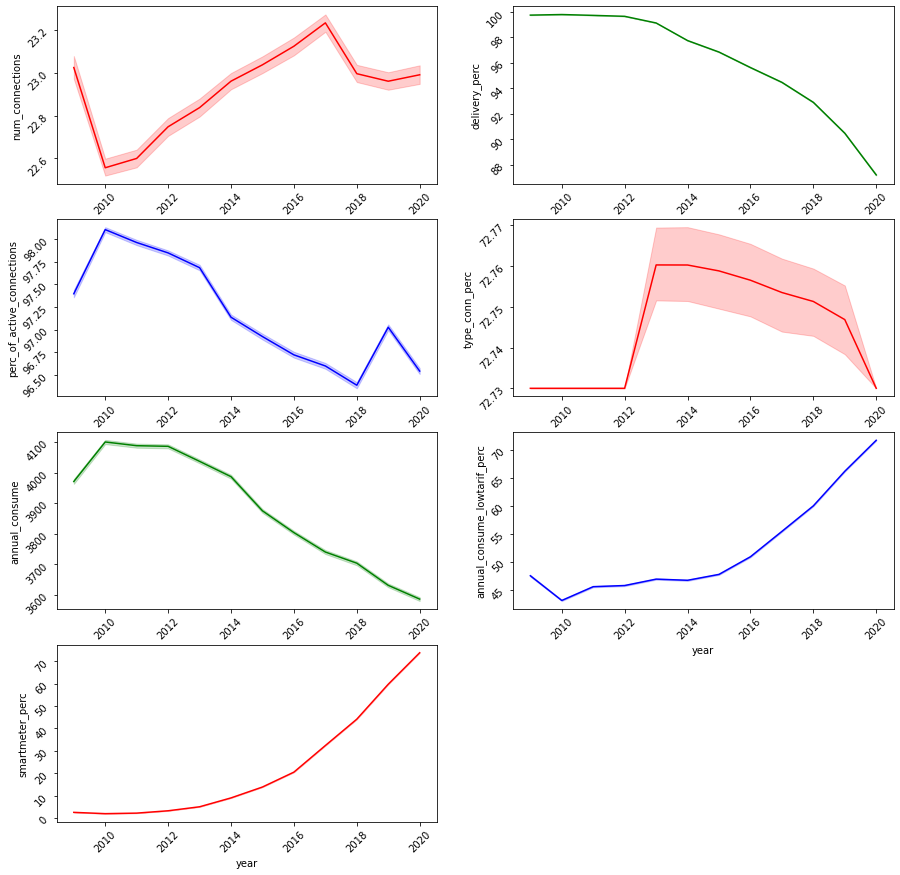

In [35]:
fig,ax =  plt.subplots( 4, 2,
                       figsize = ( 15, 15))
  
sns.lineplot( x = 'year', y = "num_connections", 
             color = 'r', data = Elec_df, 
             ax = ax[0][0])
ax[0][0].tick_params(labelrotation = 45)

sns.lineplot( x = 'year', y = "delivery_perc", 
             color = 'g', data = Elec_df,
             ax = ax[0][1])
ax[0][1].tick_params(labelrotation = 45)

sns.lineplot(x = 'year', y = "perc_of_active_connections", 
             color = 'b', data = Elec_df,
             ax = ax[1][0])
ax[1][0].tick_params(labelrotation = 45)
  
sns.lineplot(x = 'year', y = "type_conn_perc", 
             color = 'r', data = Elec_df, 
             ax = ax[1][1])
ax[1][1].tick_params(labelrotation = 45)

sns.lineplot(x = 'year', y = "annual_consume", 
             color = 'g', data = Elec_df, 
             ax = ax[2][0])
ax[2][0].tick_params(labelrotation = 45)

sns.lineplot(x = 'year', y = "annual_consume_lowtarif_perc", 
             color = 'b', data = Elec_df, 
             ax = ax[2][1])
ax[2][1].tick_params(labelrotation = 45)

sns.lineplot(x = 'year', y = "smartmeter_perc", 
             color = 'r', data = Elec_df, 
             ax = ax[3][0])
ax[3][0].tick_params(labelrotation = 45)

fig.delaxes(ax[3][1])

We have been able to plot our 7 float columns and visualize their trends using a lineplot.
Some key insights can already be observed from our plots, like the drop in yearly annual consumption, the rise of smartmeter percentage, annual consumption low tarrif percentage etc

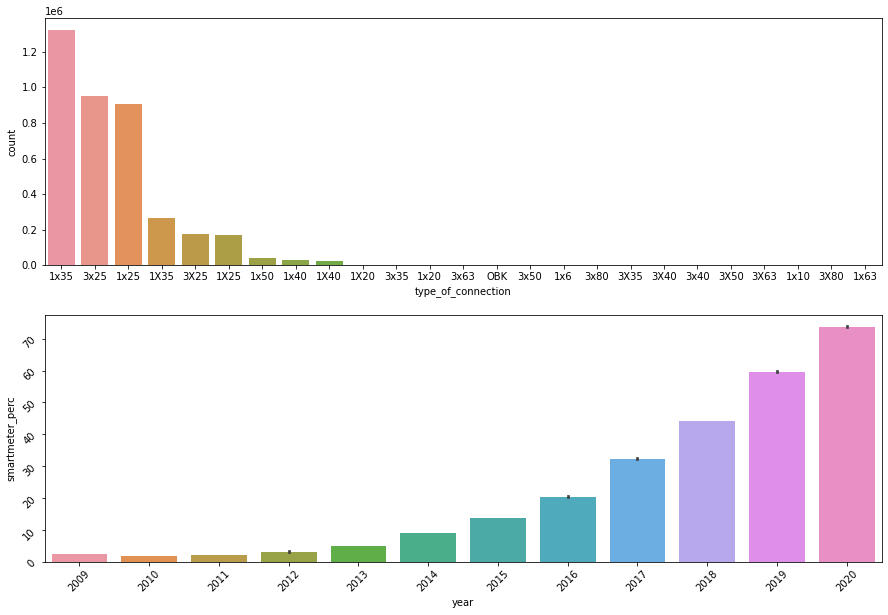

In [36]:
fig, ax = plt.subplots(2,1, figsize=(15,10))
# plt.figure(figsize=(15,10))
sns.countplot(x='type_of_connection', data=Elec_df, order = Elec_df['type_of_connection'].value_counts().index, ax=ax[0])
sns.barplot(x=Elec_df['year'].dt.year, y='smartmeter_perc', data=Elec_df, ax=ax[1])
ax[1].tick_params(labelrotation = 45)

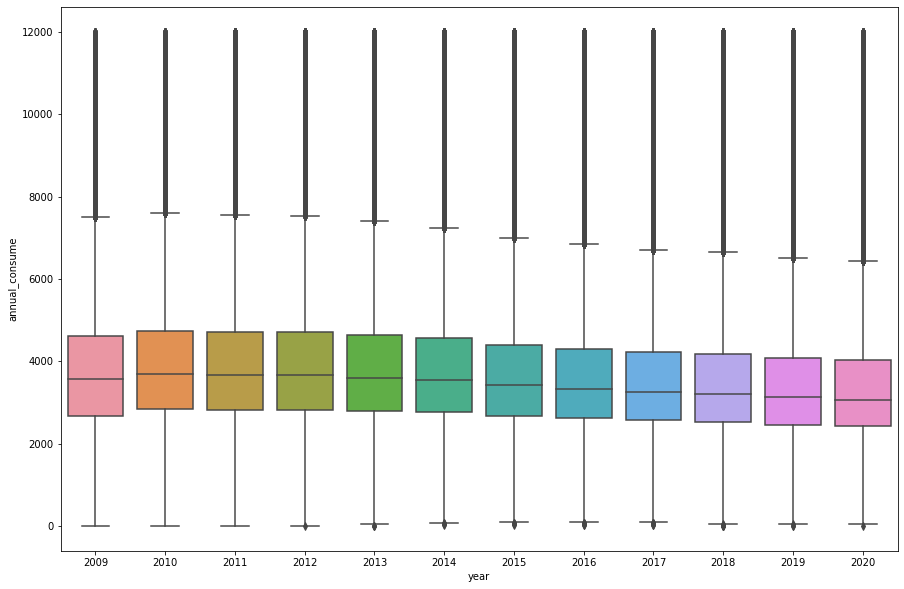

In [37]:
plt.figure(figsize=(15,10))
sns.boxplot(x=Elec_df['year'].dt.year,  y='annual_consume', data=Elec_df)
plt.show()

A categorical plot of the different connection types in our dataset, we can observe a lot of largely represented connection types and some scarce connection types. And also a kde plot showing the presence of outliers in our annual consume column

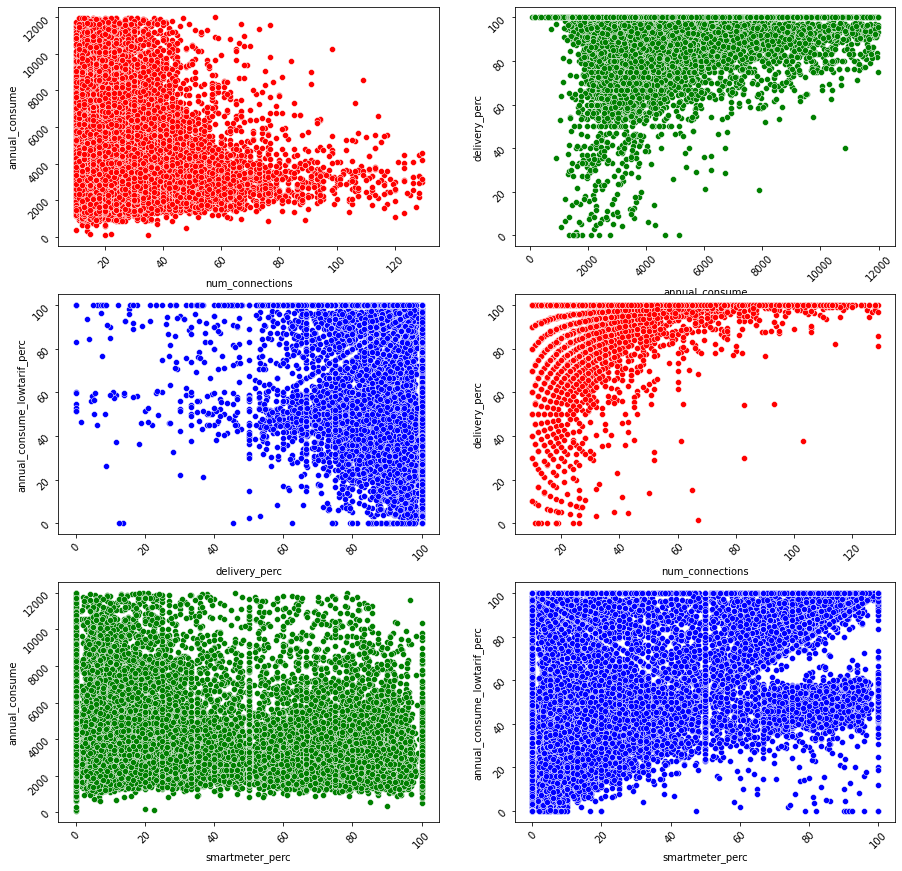

In [38]:
# Visualize Correlations using a regplot
# You can also do this using a for loop for neater code
plot_df = Elec_df.sample(frac=0.01)
fig,ax =  plt.subplots( 3, 2,
                       figsize = ( 15, 15))
  
sns.scatterplot( x = 'num_connections', y = "annual_consume", 
             color = 'r', data = plot_df, 
             ax = ax[0][0])
ax[0][0].tick_params(labelrotation = 45)

sns.scatterplot( x = 'annual_consume', y = "delivery_perc", 
             color = 'g', data = plot_df,
             ax = ax[0][1])
ax[0][1].tick_params(labelrotation = 45)

sns.scatterplot(x = 'delivery_perc', y = "annual_consume_lowtarif_perc", 
             color = 'b', data = plot_df, 
             ax = ax[1][0])
ax[1][0].tick_params(labelrotation = 45)
  
sns.scatterplot(x = 'num_connections', y = "delivery_perc", 
             color = 'r', data = plot_df,
             ax = ax[1][1])
ax[1][1].tick_params(labelrotation = 45)

sns.scatterplot(x = 'smartmeter_perc', y = "annual_consume", 
             color = 'g', data = plot_df,
             ax = ax[2][0])
ax[2][0].tick_params(labelrotation = 45)

sns.scatterplot(x = 'smartmeter_perc', y = "annual_consume_lowtarif_perc", 
             color = 'b', data = plot_df,
             ax = ax[2][1])
ax[2][1].tick_params(labelrotation = 45)

Some plots easily show your the correlations between our numerical data and others not so much, but these plots will be broken down using future plots

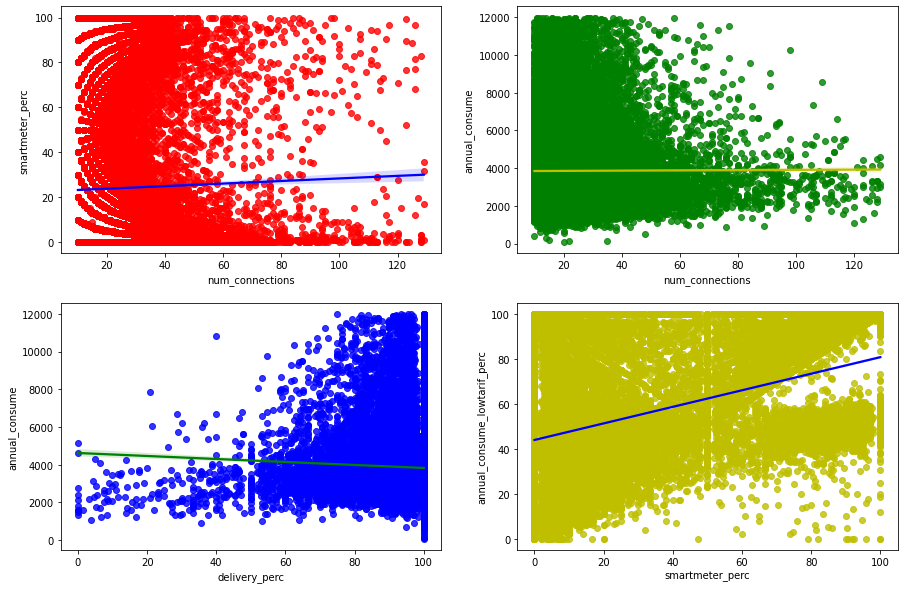

In [39]:
fig,ax =  plt.subplots( 2,2,
                       figsize = ( 15, 10))

sns.regplot(x = 'num_connections', y = "smartmeter_perc", 
             color = 'r', data = plot_df, line_kws={'color': 'b'},
             ax = ax[0][0] )

sns.regplot( x = 'num_connections', y = "annual_consume", 
             color = 'g', data = plot_df, line_kws={'color': 'y'},
             ax = ax[0][1])

sns.regplot(x = 'delivery_perc', y = "annual_consume", 
             color = 'b', data = plot_df, line_kws={'color': 'g'},
             ax = ax[1][0])

sns.regplot(x = 'smartmeter_perc', y = "annual_consume_lowtarif_perc", 
             color = 'y', data = plot_df, line_kws={'color': 'b'},
             ax = ax[1][1])
plt.show()

In [40]:
plot_df.head()
print(len(plot_df['type_of_connection'].unique()))
type_stats = plot_df.groupby('type_of_connection')['type_of_connection'].agg('count').sort_values(ascending=False)
type_stats_less = type_stats[type_stats<1000]
plot_df['type_of_connection'] = plot_df['type_of_connection'].apply(lambda x: 'other' if x in type_stats_less else x)
print(len(plot_df['type_of_connection'].unique()))
plot_df['type_of_connection'].unique()

19
7


array(['1x25', '1x35', '3x25', '1X35', '3X25', 'other', '1X25'],
      dtype=object)

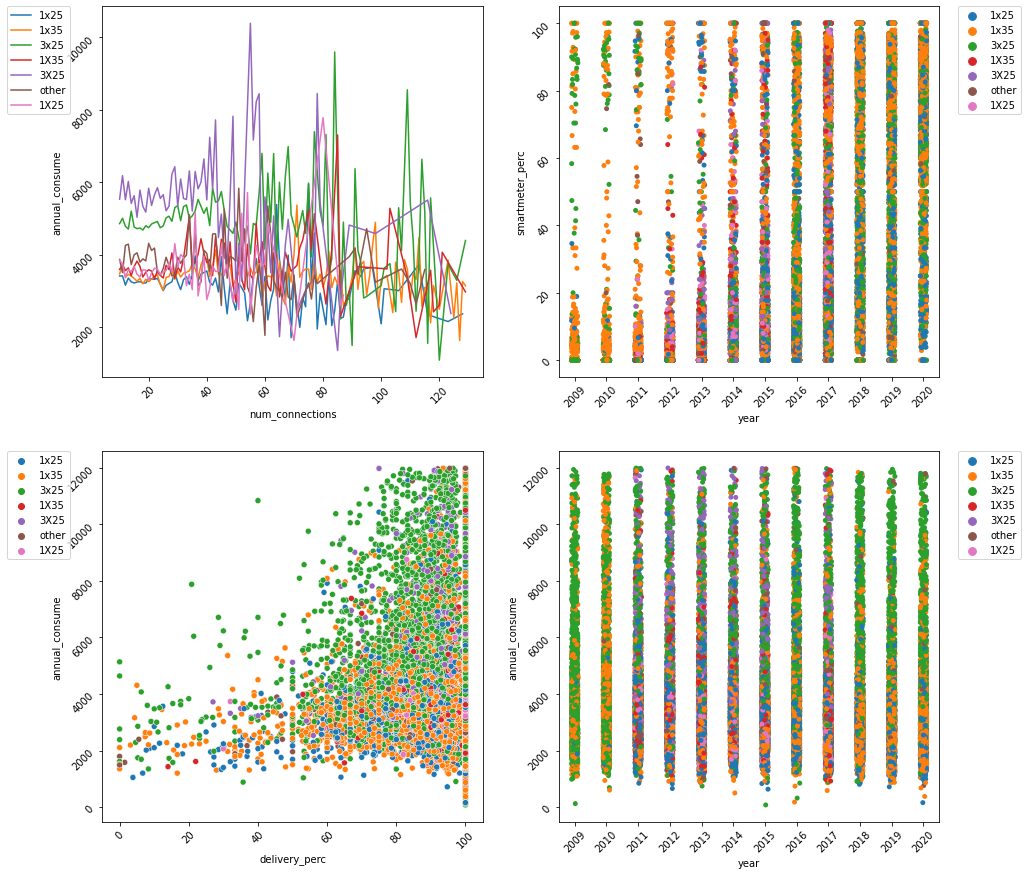

In [41]:
fig,ax =  plt.subplots( 2,2,
                       figsize = ( 15, 15))

sns.lineplot(x = 'num_connections', y = "annual_consume",
             data = plot_df, hue='type_of_connection', ci=None, 
             ax = ax[0][0] )
ax[0][0].tick_params(labelrotation = 45)
ax[0][0].legend(bbox_to_anchor=(-0.25, 1), loc=2, borderaxespad=0.)

sns.stripplot( x = plot_df['year'].dt.year, y='smartmeter_perc', hue='type_of_connection',
             data = plot_df,
             ax = ax[0][1])
ax[0][1].tick_params(labelrotation = 45)
ax[0][1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sns.scatterplot(x = 'delivery_perc', y = "annual_consume", 
             color = 'b', data = plot_df, hue='type_of_connection',
             ax = ax[1][0])
ax[1][0].tick_params(labelrotation = 45)
ax[1][0].legend(bbox_to_anchor=(-0.25, 1), loc=2, borderaxespad=0.)

sns.stripplot(x = plot_df['year'].dt.year, y = "annual_consume", 
              data = plot_df, hue='type_of_connection',
             ax = ax[1][1])
ax[1][1].tick_params(labelrotation = 45)
ax[1][1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

**GEOSPATIAL ANALYSIS**

We get the top ten most common cities in our dataframe and get some visualisations concerning their annual consumption, smart meter usage etc.

In [42]:
top_10_cities = plot_df['city'].value_counts().sort_values(ascending = False).nlargest(10)
top_10_cities

AMSTERDAM        1825
'S-GRAVENHAGE    1368
ROTTERDAM        1242
UTRECHT           618
GRONINGEN         489
ALMERE            477
EINDHOVEN         448
NIJMEGEN          429
HAARLEM           408
ARNHEM            398
Name: city, dtype: int64

In [43]:
top_10_df = plot_df[plot_df['city'].isin(top_10_cities.index)] 
top_10_df.head()

,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,year,annual_consume_lowtarif_perc,smartmeter_perc
3110650,De Rijpgracht,1056XP,1056XP,AMSTERDAM,52.0,100.00,98.08,72.73,1x35,1310.00,2012-01-01,3.85,0.00
1863079,Zinkerstraat,3071HP,3071HP,ROTTERDAM,28.0,100.00,100.00,72.73,1x35,3443.00,2012-01-01,96.43,10.71
25590,Thorn Prikkerstraat,1062BS,1062BS,AMSTERDAM,83.0,54.22,68.67,72.73,3x25,2464.00,2020-01-01,71.08,69.88
1920269,Saaftingestraat,1069BV,1069BV,AMSTERDAM,28.0,100.00,100.00,72.73,3x25,1715.00,2009-01-01,0.00,0.00
2050394,Topaasring,5629GE,5629GE,EINDHOVEN,20.0,100.00,100.00,72.73,1x35,4259.25,2013-01-01,5.00,0.00


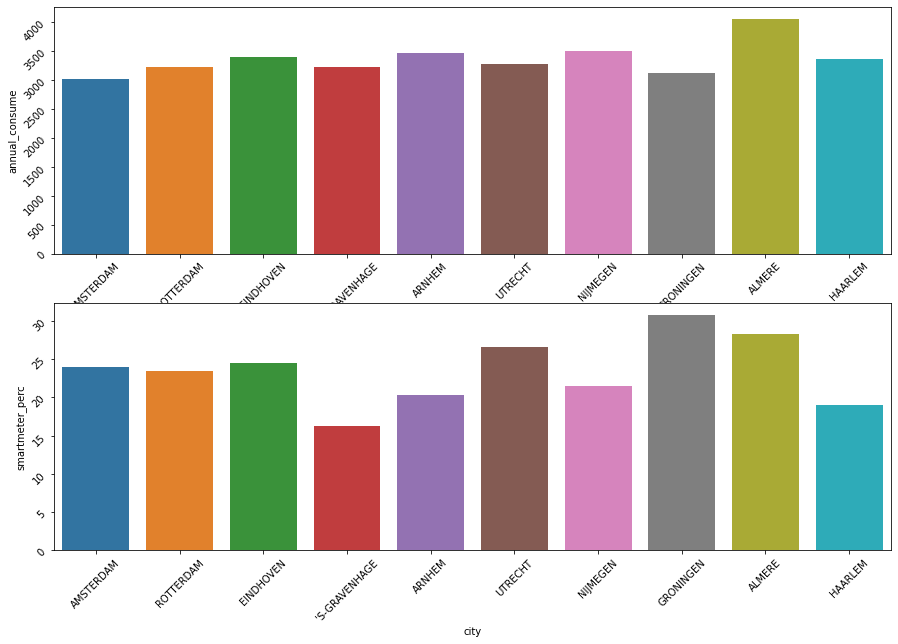

In [44]:
# sns.barplot(x='city', y='annual_consume', data=top_10_df)
fig, ax = plt.subplots(2,1, figsize=(15,10))
sns.barplot(x='city', y='annual_consume', data=top_10_df, ci=None, ax=ax[0])
ax[0].tick_params(rotation=45)
sns.barplot(x='city', y='smartmeter_perc', data=top_10_df, ci=None, ax=ax[1])
ax[1].tick_params(labelrotation = 45)
plt.show()

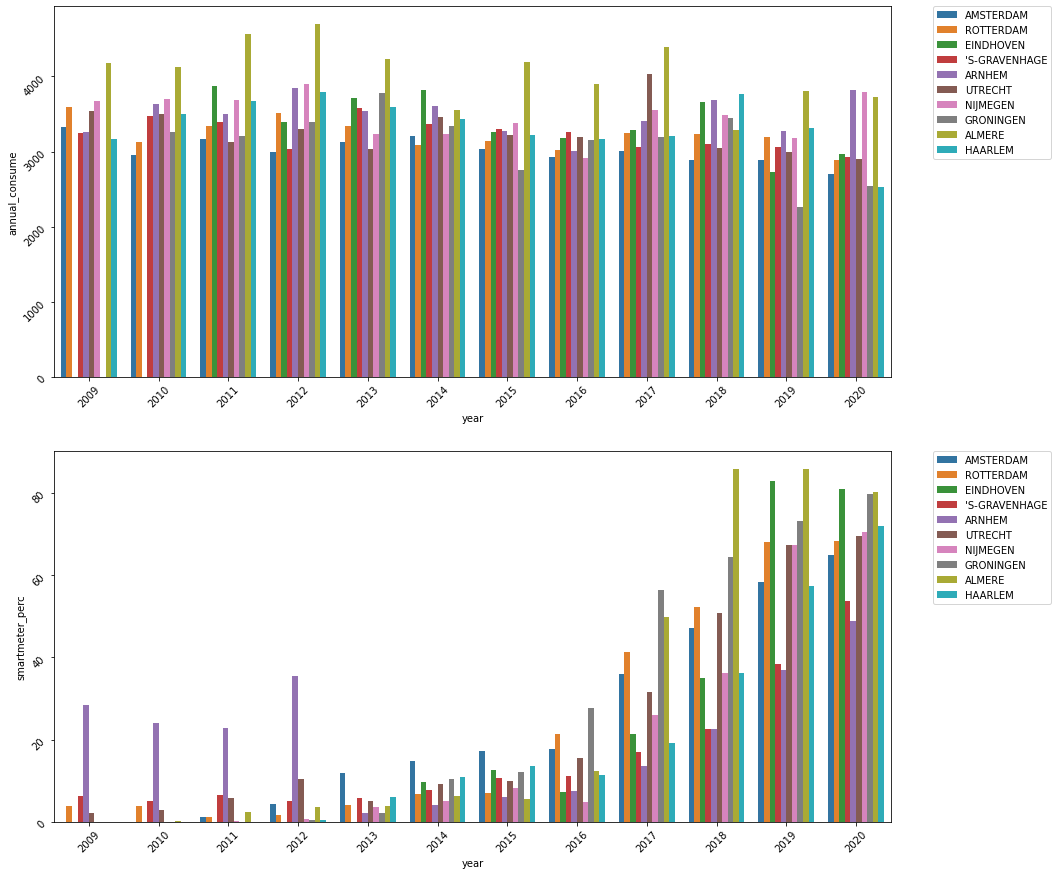

In [51]:
fig, ax = plt.subplots(2,1, figsize=(15,15))
sns.barplot(x=top_10_df['year'].dt.year, y='annual_consume', hue='city', data=top_10_df, ci=None, ax=ax[0])
ax[0].tick_params(rotation=45)
ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.barplot(x=top_10_df['year'].dt.year, y='smartmeter_perc', hue='city', data=top_10_df, ci=None, ax=ax[1])
ax[1].tick_params(labelrotation = 45)
ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

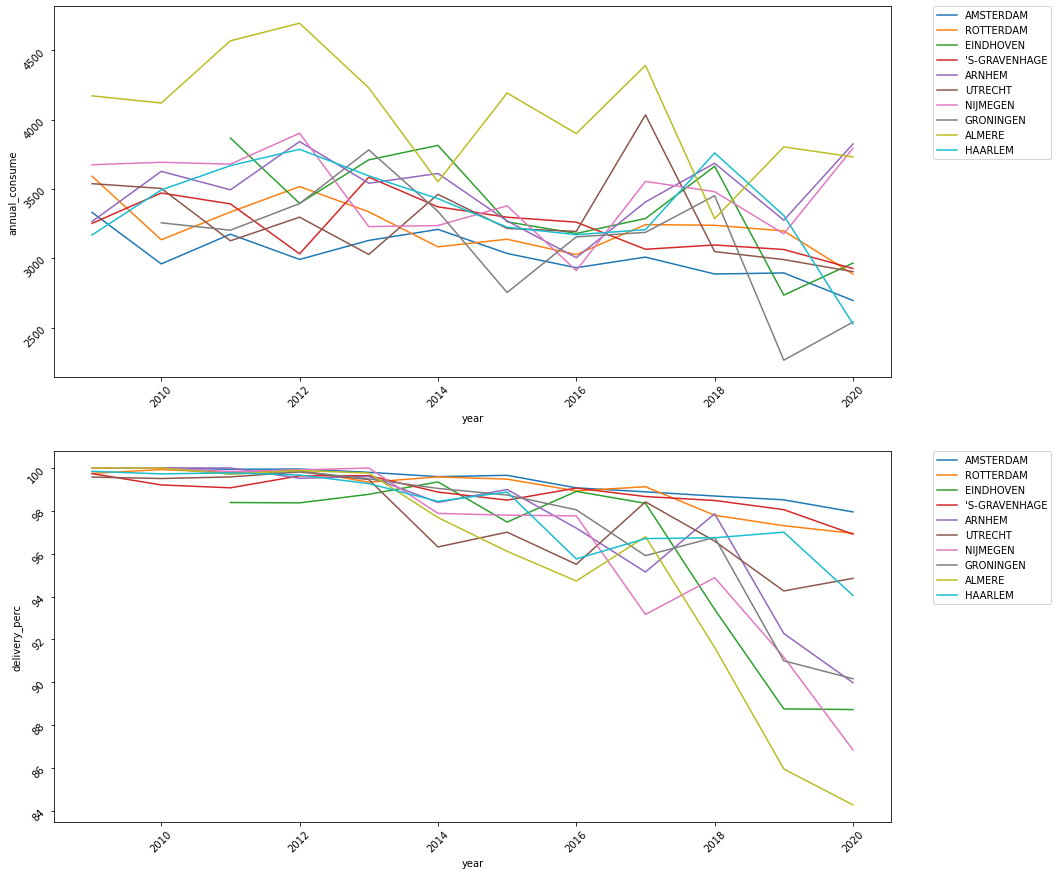

In [87]:
# plt.figure(figsize=(15,10))
# sns.lineplot(x = 'year', y = "annual_consume", ci=None,
#              hue='city', data = top_10_df)
# plt.xticks(rotation=35)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()
fig, ax = plt.subplots(2,1, figsize=(15,15))
sns.lineplot(x=top_10_df['year'].dt.year, y='annual_consume', hue='city', data=top_10_df, ci=None, ax=ax[0])
ax[0].tick_params(rotation=45)
ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.lineplot(x=top_10_df['year'].dt.year, y='delivery_perc', hue='city', data=top_10_df, ci=None, ax=ax[1])
ax[1].tick_params(labelrotation = 45)
ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

We can obeserve a few things from our plots above, such as the smll drop in annual consume over the years in the most common cities. The high adoption rate of smart meters across the cities. Lastly the slow adoption of solar in some of the cities and some cities like Almere rising adoption in the green solution as seen from the drop in the delivery percentage

We try to get the cities with the highest consumption as at 2020 and see their trends over the previous years.

In [71]:
# cities with the largest annual consumption in 2020
Elec_top_10_cities = plot_df[plot_df['year'].dt.year==2020].sort_values('annual_consume', ascending=False)['city'].head(10)
Elec_top_10_cities

3906790    LOPIKERKAPEL
2706445       NIJVERDAL
98851        HOEVELAKEN
105022         NIJMEGEN
2661055          VEGHEL
3918487       MIJDRECHT
101502          LIENDEN
17948         AMSTERDAM
128190          HEELWEG
90547        OEGSTGEEST
Name: city, dtype: object

In [74]:
Elec_top_10_df = plot_df[plot_df['city'].isin(Elec_top_10_cities)] 
print(Elec_top_10_df['city'].unique())
Elec_top_10_df.head()

['AMSTERDAM' 'NIJMEGEN' 'MIJDRECHT' 'NIJVERDAL' 'VEGHEL' 'HOEVELAKEN'
 'OEGSTGEEST' 'LIENDEN' 'LOPIKERKAPEL' 'HEELWEG']


,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,year,annual_consume_lowtarif_perc,smartmeter_perc
3110650,De Rijpgracht,1056XP,1056XP,AMSTERDAM,52.0,100.00,98.08,72.73,1x35,1310.0,2012-01-01,3.85,0.00
25590,Thorn Prikkerstraat,1062BS,1062BS,AMSTERDAM,83.0,54.22,68.67,72.73,3x25,2464.0,2020-01-01,71.08,69.88
1920269,Saaftingestraat,1069BV,1069BV,AMSTERDAM,28.0,100.00,100.00,72.73,3x25,1715.0,2009-01-01,0.00,0.00
1994488,Groenestraat,6531HW,6531HW,NIJMEGEN,10.0,100.00,100.00,72.73,3x25,5503.0,2009-01-01,30.00,0.00
2864746,Hoek van Hollandstraat,1059EV,1059EV,AMSTERDAM,25.0,100.00,100.00,72.73,1x25,2249.0,2013-01-01,100.00,100.00


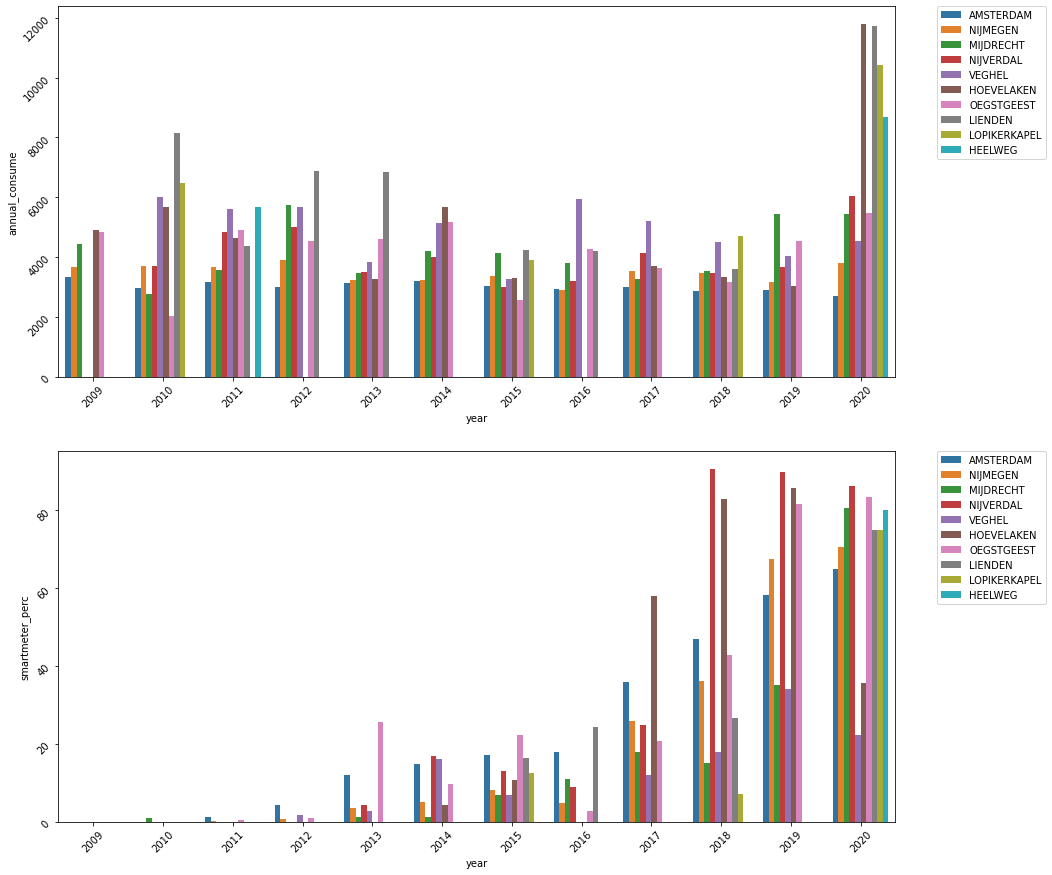

In [75]:
fig, ax = plt.subplots(2,1, figsize=(15,15))
sns.barplot(x=Elec_top_10_df['year'].dt.year, y='annual_consume', hue='city', data=Elec_top_10_df, ci=None, ax=ax[0])
ax[0].tick_params(rotation=45)
ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.barplot(x=Elec_top_10_df['year'].dt.year, y='smartmeter_perc', hue='city', data=Elec_top_10_df, ci=None, ax=ax[1])
ax[1].tick_params(labelrotation = 45)
ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

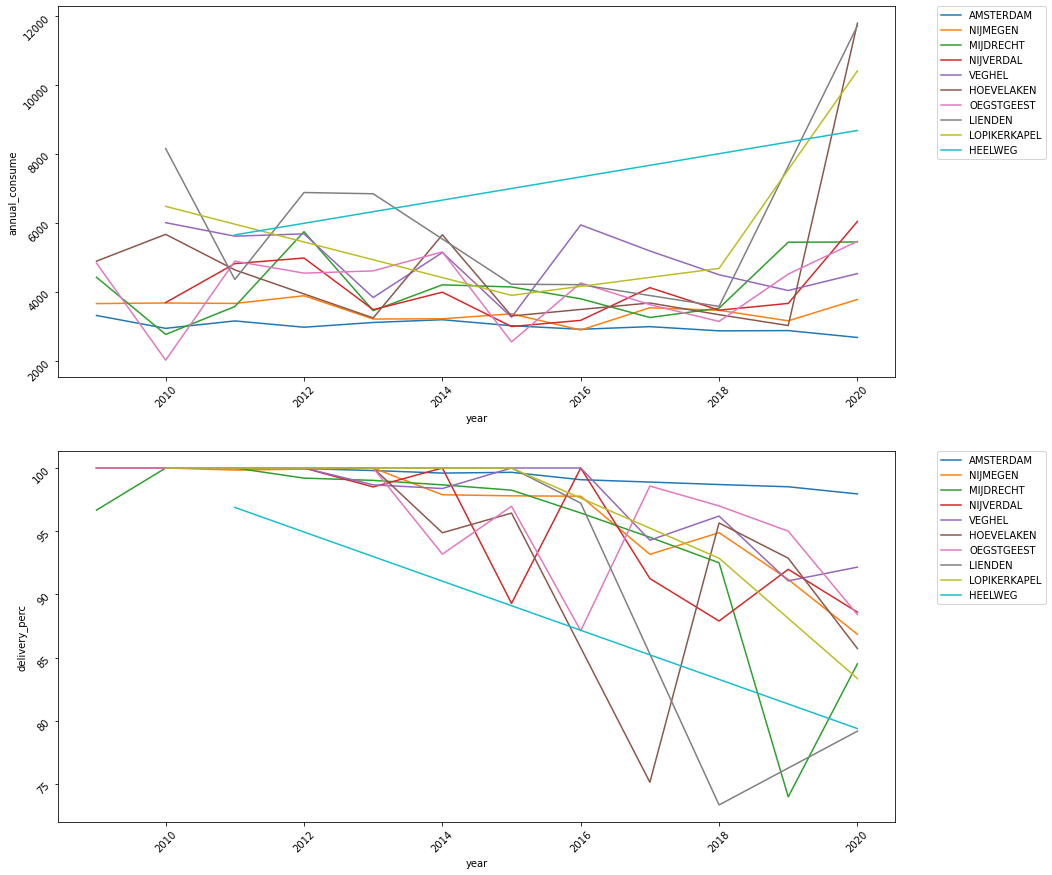

In [90]:
# plt.figure(figsize=(15,10))
# sns.lineplot(x = 'year', y = "annual_consume", ci=None,
#              hue='city', data = Elec_top_10_df)
# plt.xticks(rotation=35)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()

fig, ax = plt.subplots(2,1, figsize=(15,15))
sns.lineplot(x=Elec_top_10_df['year'].dt.year, y='annual_consume', hue='city', data=Elec_top_10_df, ci=None, ax=ax[0])
ax[0].tick_params(rotation=45)
ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.lineplot(x=Elec_top_10_df['year'].dt.year, y='delivery_perc', hue='city', data=Elec_top_10_df, ci=None, ax=ax[1])
ax[1].tick_params(labelrotation = 45)
ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

A suprising thing to notice is the abrupt jump of annual consumtion in some of these cities, a huge spike was observed in 2020, deviating from normal, This might be due to various factors such as mass immigration, industrilizaion of the area etc. There is also a large adoption of smart meters in these cities. The solar trend of these cities all point downward with a lot of spikes, showing there might have been a need for larger energy consumption than could be provided by the solar.

We try to get the cities with the lowest delivery percentage as a result of green energy adoptions

In [94]:
solar_top_5_cities = plot_df[plot_df['year'].dt.year==2020].sort_values('delivery_perc', ascending=True)['city'].head(5)
solar_top_5_cities

2630127    DINTELOORD
2734593         ASSEN
2747034     GRONINGEN
142015       LELYSTAD
2720708         EMMEN
Name: city, dtype: object

In [95]:
solar_top_5_df = plot_df[plot_df['city'].isin(solar_top_5_cities)] 
print(solar_top_5_df['city'].unique())
solar_top_5_df.describe()

['ASSEN' 'EMMEN' 'LELYSTAD' 'GRONINGEN' 'DINTELOORD']


,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
count,1048.000000,1048.000000,1048.000000,1048.00,1048.000000,1048.000000,1048.000000
mean,21.023855,95.380067,99.217786,72.73,3343.572968,34.890897,28.081269
std,9.102536,12.633214,4.147823,0.00,1688.695939,20.687760,36.215675
min,10.000000,0.000000,50.000000,72.73,921.000000,0.000000,0.000000
25%,15.000000,96.970000,100.000000,72.73,2302.750000,19.000000,0.000000
50%,19.000000,100.000000,100.000000,72.73,2957.285000,34.000000,7.000000
75%,24.000000,100.000000,100.000000,72.73,3889.000000,47.000000,62.625000
max,107.000000,100.000000,100.000000,72.73,11920.000000,100.000000,100.000000


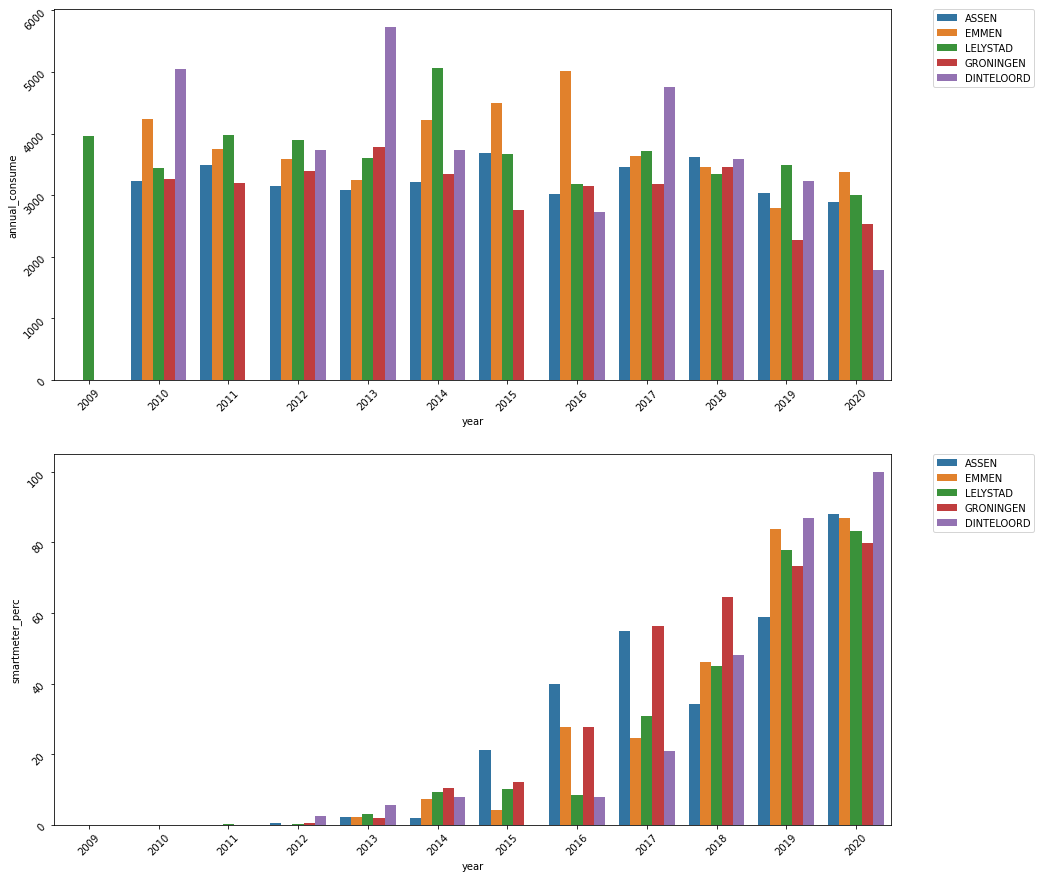

In [96]:
fig, ax = plt.subplots(2,1, figsize=(15,15))
sns.barplot(x=solar_top_5_df['year'].dt.year, y='annual_consume', hue='city', data=solar_top_5_df, ci=None, ax=ax[0])
ax[0].tick_params(rotation=45)
ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.barplot(x=solar_top_5_df['year'].dt.year, y='smartmeter_perc', hue='city', data=solar_top_5_df, ci=None, ax=ax[1])
ax[1].tick_params(labelrotation = 45)
ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

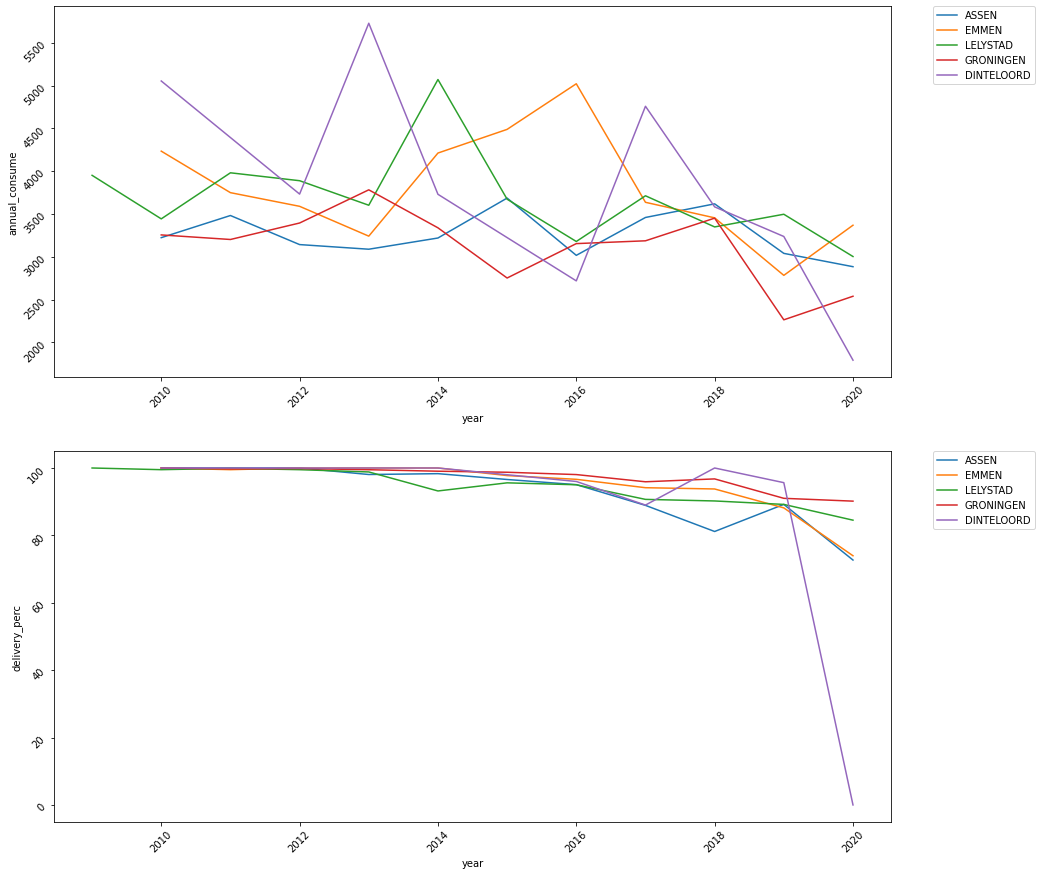

In [97]:
fig, ax = plt.subplots(2,1, figsize=(15,15))
sns.lineplot(x=solar_top_5_df['year'].dt.year, y='annual_consume', hue='city', data=solar_top_5_df, ci=None, ax=ax[0])
ax[0].tick_params(rotation=45)
ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.lineplot(x=solar_top_5_df['year'].dt.year, y='delivery_perc', hue='city', data=solar_top_5_df, ci=None, ax=ax[1])
ax[1].tick_params(labelrotation = 45)
ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Most of the cities identified have their annual consumption dropping ever so lightly especially in the latter years, which can be attributed to their green energy adoption, there is also a very large acceptance for smart meters over the years and Lastly the delivery percentages are seen to decline gradually in these cities.  

I will be stopping here for my notebook but i imploy you to do the same analysis or even better analysis for the gas dataframe, also you can try building a time series model to predict annual consuption.
As always feedbcks are apppreciated and i feel i made some redundant plots. Thanks 